In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

df = pd.read_csv('./data/11-26/daily_plutchik_threshold_5.csv', parse_dates=['month/day'])
sentiment_df = pd.read_csv('./data/12-6/daily_senti_corrected.csv', parse_dates=['month/day'])
df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation
0,2017-05-07,0.010870,0.021739,0.086957,0.097826,0.032609,0.097826,0.652174,0.000000
1,2017-05-08,0.015785,0.019732,0.071823,0.099448,0.021310,0.105762,0.654301,0.011839
2,2017-05-09,0.018973,0.024554,0.063616,0.093750,0.035714,0.100446,0.652902,0.010045
3,2017-05-10,0.021674,0.033715,0.060205,0.099338,0.031306,0.095725,0.645394,0.012643
4,2017-05-11,0.017838,0.033578,0.055614,0.134313,0.035677,0.123820,0.597062,0.002099


In [2]:
import numpy as np
import pandas as pd

def zscore(df, col):
    col_mean = df[col].rolling(window=14, center=True).mean()
    col_std = df[col].rolling(window=14, center=True).std()
    return (df[col] - col_mean)/col_std

In [3]:
df["Anticipation Z-Score"] = zscore(df, "Anticipation")
df["Trust Z-Score"] = zscore(df, "Trust")
df["Surprise Z-Score"] = zscore(df, "Surprise")
df["Sadness Z-Score"] = zscore(df, "Sadness")
df["Joy Z-Score"] = zscore(df, "Joy")
df["Fear Z-Score"] = zscore(df, "Fear")
df["Disgust Z-Score"] = zscore(df, "Disgust")
df["Anger Z-Score"] = zscore(df, "Anger")

In [4]:
sentiment_df = sentiment_df.rename(columns={'pos_sentiment':'Positive Sentiment', 'neg_sentiment': 'Negative Sentiment', 'neu_sentiment': 'Neutral Sentiment'})
for (columnName, columnData) in sentiment_df.iteritems():
    if columnName != "month/day":
        sentiment_df[columnName+" Z-Score"] = zscore(sentiment_df, columnName)

In [5]:
from datetime import datetime, timedelta

start_date = datetime(2017, 5, 15, 0, 0)
end_date = datetime(2017, 7, 15, 0, 0)
paris_accord_date = datetime(2017, 6, 1, 0, 0)
july_4_date = datetime(2017, 7, 4, 0, 0)
df["month/day"] = pd.to_datetime(df["month/day"])
paris_accord_df = df[(df['month/day'] >= start_date) & (df['month/day'] <= end_date)]
paris_accord_df.head()

,month/day,Anger,Disgust,Fear,Joy,Sadness,Surprise,Trust,Anticipation,Anticipation Z-Score,Trust Z-Score,Surprise Z-Score,Sadness Z-Score,Joy Z-Score,Fear Z-Score,Disgust Z-Score,Anger Z-Score
8,2017-05-15,0.036745,0.034121,0.062992,0.125984,0.026247,0.110236,0.593176,0.010499,0.129850,0.010891,-0.787899,-0.381476,-0.035409,-0.000351,1.211811,2.469100
9,2017-05-16,0.012351,0.012134,0.057205,0.099892,0.020585,0.152763,0.639220,0.005850,-0.882214,0.837601,0.217486,-1.335029,-0.561359,-0.344041,-1.054657,-0.477652
10,2017-05-17,0.010534,0.011731,0.067513,0.107972,0.025138,0.193440,0.576730,0.006943,-0.525540,-0.098265,1.316717,-0.394809,-0.393333,0.355443,-1.114069,-0.619991
11,2017-05-18,0.016096,0.016505,0.048015,0.102578,0.030146,0.172691,0.607830,0.006138,-0.510240,0.491361,0.589213,0.589801,-0.539221,-1.122734,-0.633833,0.156411
12,2017-05-19,0.009538,0.012923,0.080000,0.096923,0.024000,0.171385,0.593231,0.012000,0.617683,0.326464,0.532055,-0.330691,-0.685262,1.046764,-0.915783,-0.624350


In [6]:
sentiment_df = sentiment_df[(sentiment_df["month/day"] >= start_date) & (sentiment_df["month/day"] <= end_date)]
sentiment_df = sentiment_df.reset_index(drop=True)
print(len(sentiment_df))
sentiment_df.head()

61


,month/day,Positive Sentiment,Negative Sentiment,Neutral Sentiment,Positive Sentiment Z-Score,Negative Sentiment Z-Score,Neutral Sentiment Z-Score
0,2017-05-15,0.327869,0.438152,0.233979,-0.593518,0.539274,-0.060367
1,2017-05-16,0.360533,0.390990,0.248477,-0.242583,0.011918,0.365747
2,2017-05-17,0.391456,0.355469,0.253074,0.133083,-0.471110,0.553829
3,2017-05-18,0.350605,0.345450,0.303946,-0.960484,-0.591564,1.981508
4,2017-05-19,0.347525,0.363730,0.288745,-1.107008,-0.108757,1.564711


/Users/suvir/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


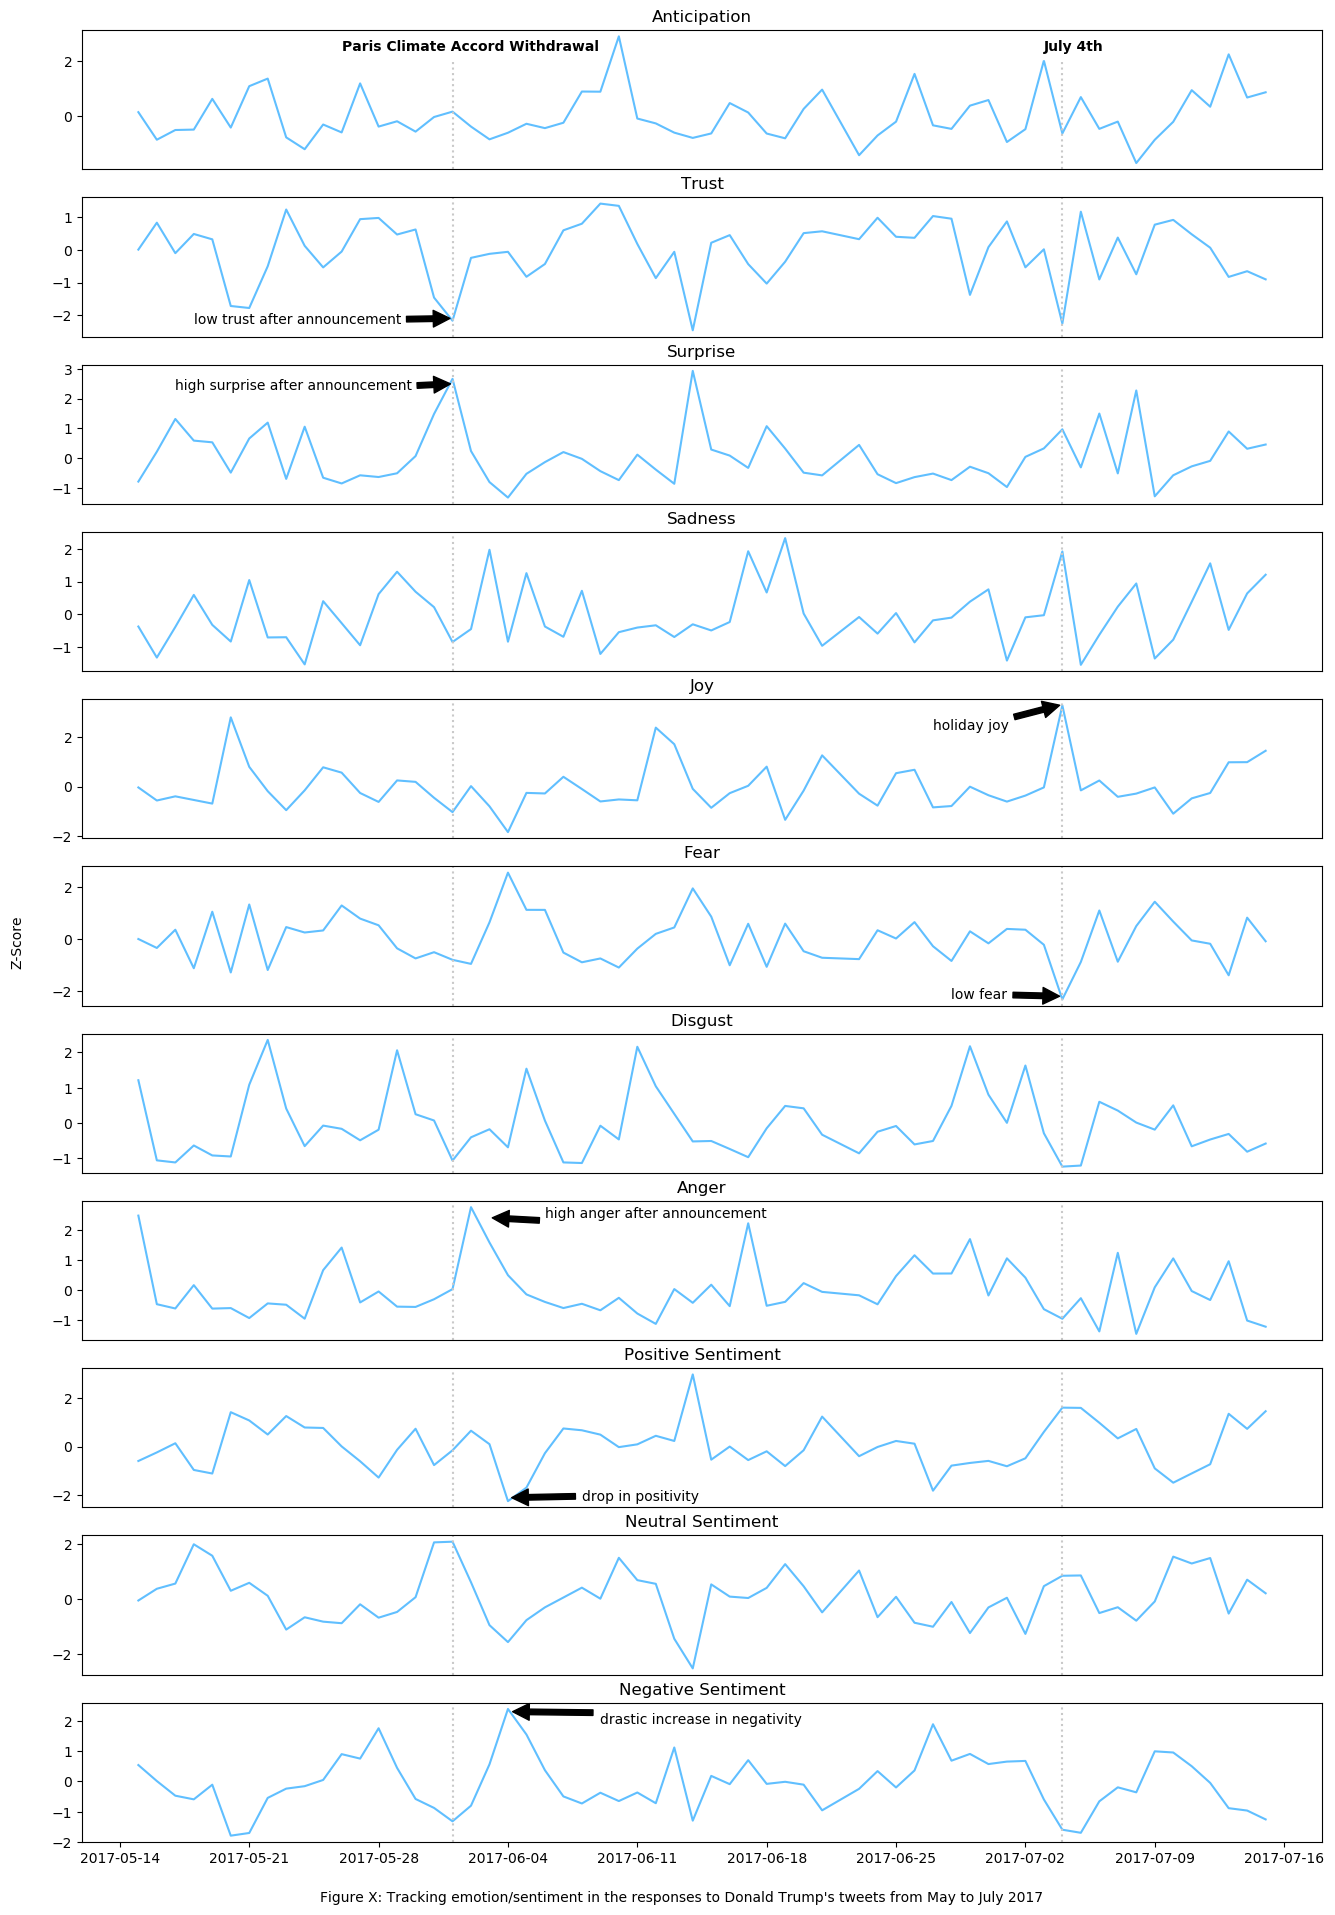

In [7]:
def add_sub_plot(data, numRows, numCols, index, title, ticksOff, annotation=None, X=None, Y=None, textX=None, textY=None):
    ax = plt.subplot(numRows, numCols, index, title=title)
    plt.plot('month/day', title + ' Z-Score', data=data, color='#60bfff')
    plt.axvline(x=paris_accord_date, color='#c9c9c9', ls='dotted')
    plt.axvline(x=july_4_date, color='#c9c9c9', ls='dotted')
    if title == 'Anticipation':
        ax.text(paris_accord_date-timedelta(6), 2.4, 'Paris Climate Accord Withdrawal', fontsize=10,
                fontweight='semibold', backgroundColor='w')
        ax.text(july_4_date-timedelta(1), 2.4, 'July 4th', fontsize=10, backgroundColor='w', fontweight='semibold')
    if ticksOff:
        plt.setp(ax.get_xticklabels(), visible=False)
        ax.tick_params(bottom="off")
    if annotation:
        ax.annotate(annotation, xy = (X, Y), xytext = (textX, textY), arrowprops=dict(facecolor='black', shrink=0.05))

fig = plt.figure(num=None, figsize=(16,24), dpi=100, facecolor='w', edgecolor='k')
add_sub_plot(paris_accord_df, 11, 1, 1, 'Anticipation', True)
add_sub_plot(paris_accord_df, 11, 1, 2, 'Trust', True, 'low trust after announcement', paris_accord_date, -2.1, paris_accord_date-timedelta(14), -2.25)
add_sub_plot(paris_accord_df, 11, 1, 3, 'Surprise', True, 'high surprise after announcement', paris_accord_date, 2.5, paris_accord_date-timedelta(15), 2.3)
add_sub_plot(paris_accord_df, 11, 1, 4, 'Sadness', True)
add_sub_plot(paris_accord_df, 11, 1, 5, 'Joy', True, 'holiday joy', july_4_date, 3.3, july_4_date-timedelta(7), 2.3)
add_sub_plot(paris_accord_df, 11, 1, 6, 'Fear', True, 'low fear', july_4_date, -2.2, july_4_date-timedelta(6), -2.3)
add_sub_plot(paris_accord_df, 11, 1, 7, 'Disgust', True)
add_sub_plot(paris_accord_df, 11, 1, 8, 'Anger', True, 'high anger after announcement', paris_accord_date+timedelta(2), 2.4, paris_accord_date+timedelta(5), 2.4)
add_sub_plot(sentiment_df, 11, 1, 9, 'Positive Sentiment', True, 'drop in positivity', paris_accord_date+timedelta(3), -2.1, paris_accord_date+timedelta(7), -2.2)
add_sub_plot(sentiment_df, 11, 1, 10, 'Neutral Sentiment', True)
add_sub_plot(sentiment_df, 11, 1, 11, 'Negative Sentiment', False, 'drastic increase in negativity', paris_accord_date+timedelta(3), 2.3, paris_accord_date+timedelta(8), 1.9)
fig.text(0.08, 0.5, 'Z-Score', va='center', rotation='vertical')
fig.text(.5, .1, 'Figure X: Tracking emotion/sentiment in the responses to Donald Trump\'s tweets from May to July 2017', ha='center')

plt.savefig('intervention_analyses.png')
plt.show()